In [1]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

Samples total - 20640  
Dimensionality - 8  
Features - real  
Target - real 0.15 - 5.

In [2]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
california_housing = fetch_california_housing()

In [4]:
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

In [5]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
california_housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
data.shape

(20640, 8)

In [10]:
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [11]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [12]:
data['median_house_value'] = california_housing.target

In [13]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


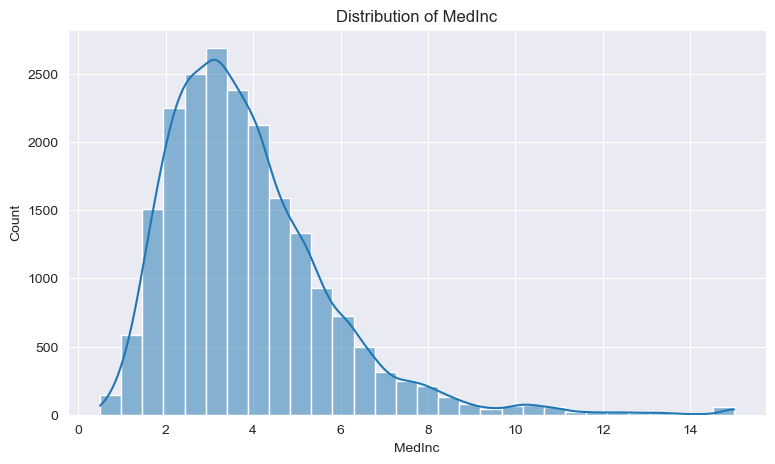

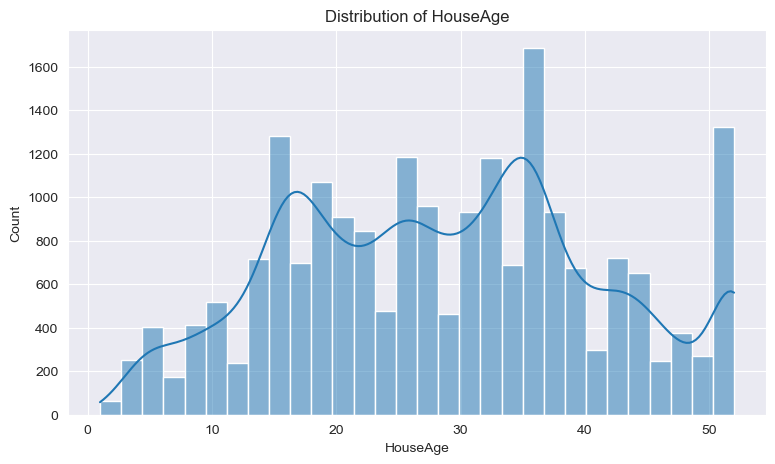

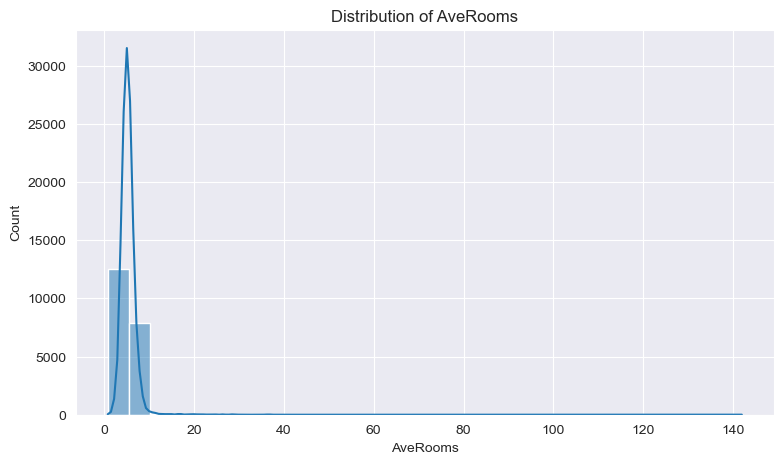

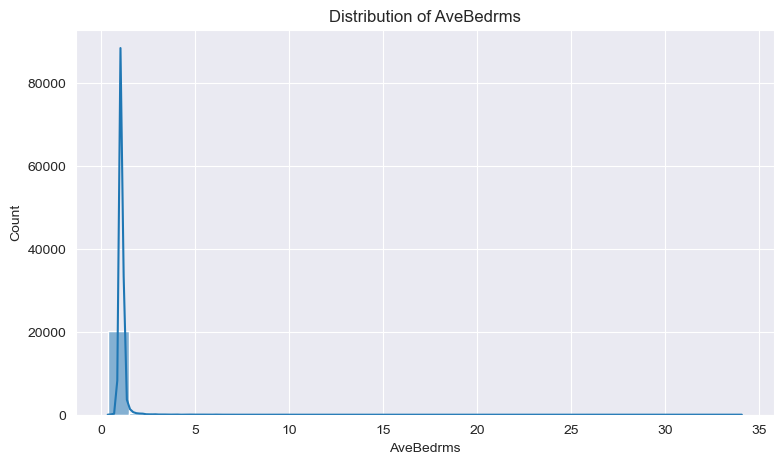

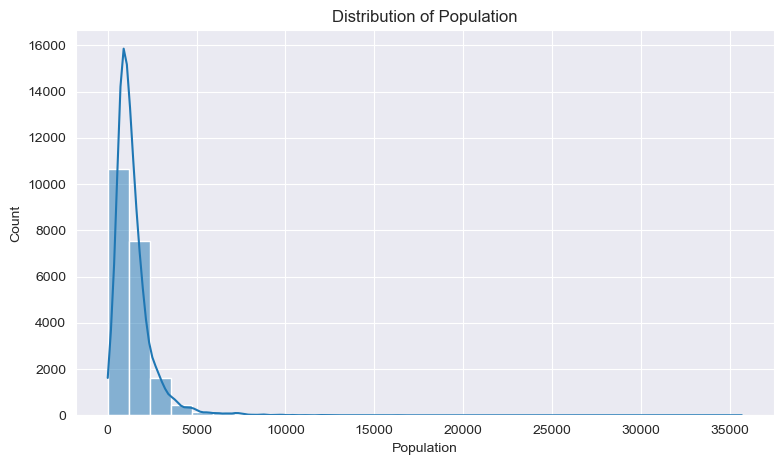

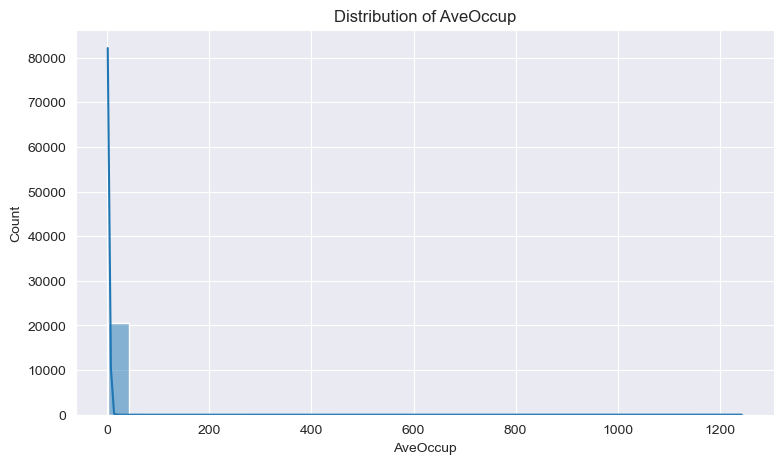

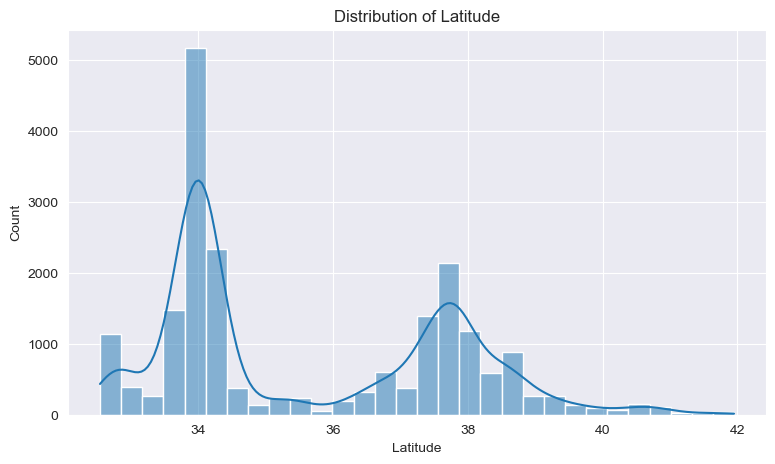

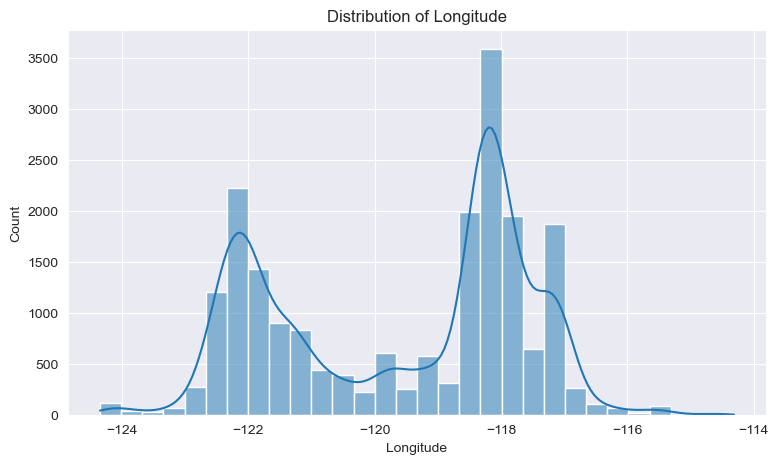

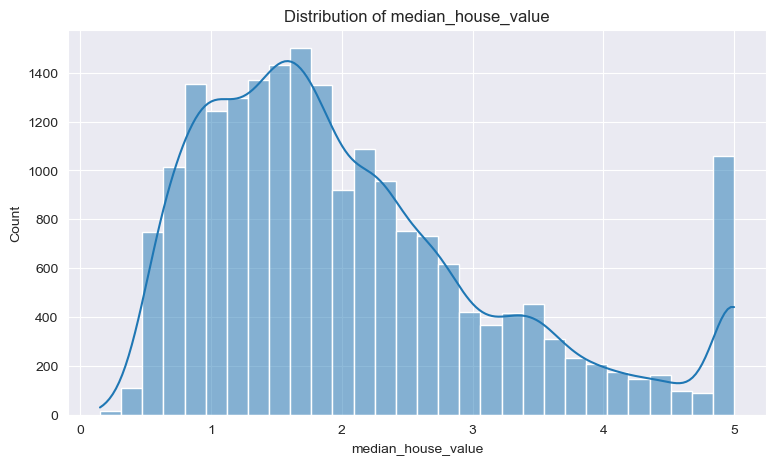

In [14]:
# Гистограммы и распределения признаков
for column in data.columns:
    plt.figure(figsize=(9, 5))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Сразу замечаем, что в некоторых признаках имеются большие выбросы

In [15]:
max(data.AveOccup)

1243.3333333333333

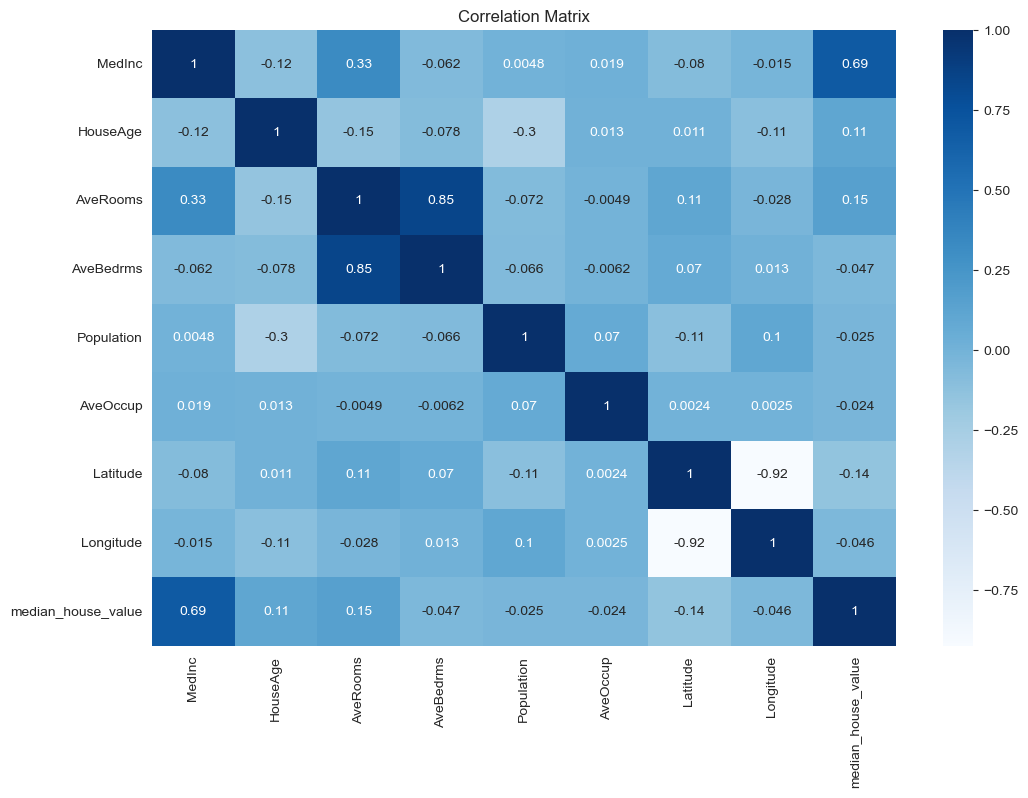

In [16]:
# Корреляционная матрица и тепловая карта
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

Не очень хорошая корреляция широты и долготы. Кажется, признаки особо не помогут, увидим позже.
Медианный доход в блочной группе на 0.69 коррелирует с целевой переменной, это может не совсем верно обучеить нашу модель и она в большей степени будет зависеть от этой переменной. 

Выдвинем гипотезы: 
1. Широта и долгота не помогут улучшить модель 
2. От MedInc произойдет некоторое переобучение (без этого признака модель может обучиться лучше)

Пропусков в выборке нет, так что разделим ее на обучающее и тестовое подмножество

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
def func_metrics(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    # RMSE на обучающем и тестовом множествах
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    print('RMSE train: ', rmse_train, '\nRMSE test: ', rmse_test, '\nR2 train: ', r2_train, '\nR2 test: ', r2_test)
    return y_train, y_test, y_train_pred, y_test_pred

In [19]:
X = data.drop(columns=['median_house_value'])
y = data.median_house_value

In [20]:
y_train, y_test, y_train_pred, y_test_pred= func_metrics(X, y)

RMSE train:  0.7241463893887167 
RMSE test:  0.7315223258924335 
R2 train:  0.6014777660317849 
R2 test:  0.6161406602616051


In [21]:
#RMSE на обучающем и тестовом множествах
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [22]:
rmse_train

0.7241463893887167

In [23]:
rmse_test

0.7315223258924335

In [24]:
# R2 на обучающем и тестовом множествах
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [25]:
r2_train

0.6014777660317849

In [26]:
from sklearn.model_selection import train_test_split

y = data['median_house_value']
X = data.drop(columns=['median_house_value'])


In [27]:
r2_test

0.6161406602616051

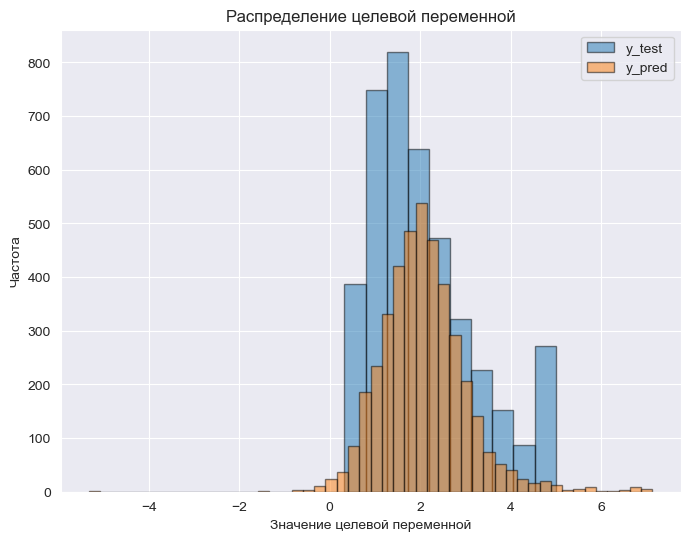

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=10, edgecolor='k', alpha=0.5, label='y_test')
plt.hist(y_test_pred, bins=50, edgecolor='k', alpha=0.5, label='y_pred')
plt.xlabel('Значение целевой переменной')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной')
plt.legend()
plt.show()

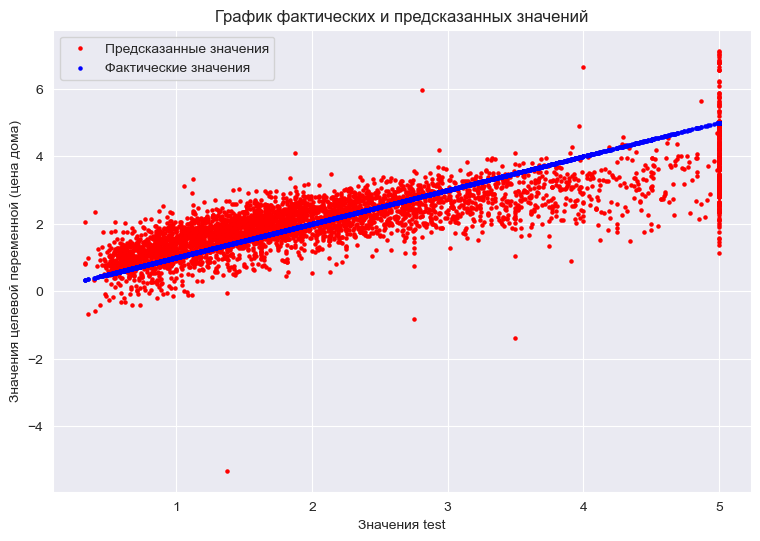

In [29]:
plt.figure(figsize=(9, 6))
plt.scatter(y_test, y_test_pred, c='red', label='Предсказанные значения', s=5)
plt.scatter(y_test, y_test, c='blue', marker='o', label='Фактические значения', s=5)
plt.xlabel('Значения test')
plt.ylabel('Значения целевой переменной (цена дома)')
plt.title('График фактических и предсказанных значений')
plt.legend()
plt.show()

Заметим, что у нас и правда есть довольно сильные выбросы, которые портрят нам метики. Если с RMSE все не так кричитно, то метрика R2 возводит ошибки в квадрат, что дает сильное падение данного показателя.

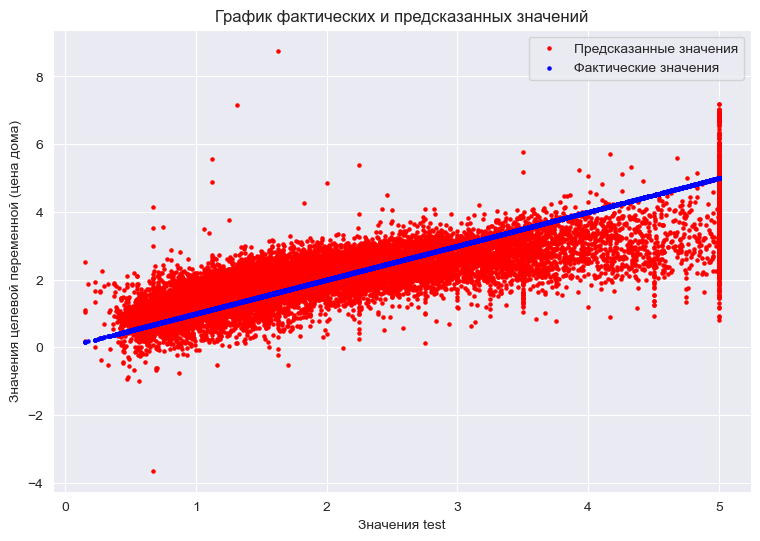

In [30]:
plt.figure(figsize=(9, 6))
plt.scatter(y_train, y_train_pred, c='red', label='Предсказанные значения', s=5)
plt.scatter(y_train, y_train, c='blue', marker='o', label='Фактические значения', s=5)
plt.xlabel('Значения test')
plt.ylabel('Значения целевой переменной (цена дома)')
plt.title('График фактических и предсказанных значений')
plt.legend()
plt.show()

In [31]:
y_test_pred.max()

7.136055068686062

In [32]:
y.describe()


count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: median_house_value, dtype: float64

In [33]:
str(float('{:.3f}'.format(((y[(y > 4.5) & (y < 5)]).count()) / y.count() * 100))) + '%'

'1.284%'

In [34]:
str(float('{:.3f}'.format(((y[(y > 5)]).count()) / y.count() * 100))) + '%'

'4.675%'

In [35]:
y[(y > 5)].count()

965

Видим, что целевая выборка распределена неравномерно, очень много значений немного больше 5 (почти 5% от всех)

Попробуем удалить признаки, которые сильно коррелируют между собой или с другими признаками (близки к 1 или -1)

In [36]:
y_upd = data['median_house_value']
X_upd= data.drop(columns=['median_house_value', 'Longitude'])

In [37]:
y_train_upd, y_test_upd, y_train_pred_upd, y_test_pred_upd = func_metrics(X_upd,y_upd)

RMSE train:  0.7794721243881273 
RMSE test:  0.7982854019364737 
R2 train:  0.5382562838141195 
R2 test:  0.5428767439507838


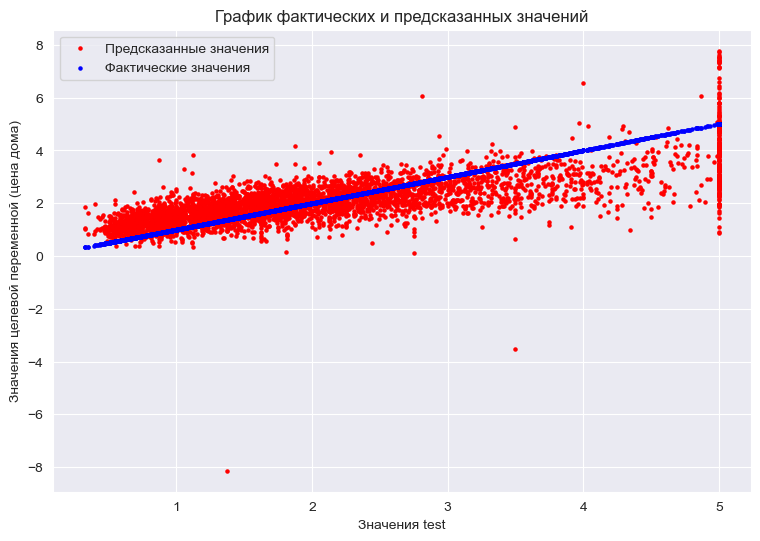

In [38]:
plt.figure(figsize=(9, 6))
plt.scatter(y_test_upd, y_test_pred_upd, c='red', label='Предсказанные значения', s=5)
plt.scatter(y_test_upd, y_test_upd, c='blue', marker='o', label='Фактические значения', s=5)
plt.xlabel('Значения test')
plt.ylabel('Значения целевой переменной (цена дома)')
plt.title('График фактических и предсказанных значений')
plt.legend()
plt.show()

In [39]:
correlation_matrix_updated = X_upd.join(y_upd).corr()

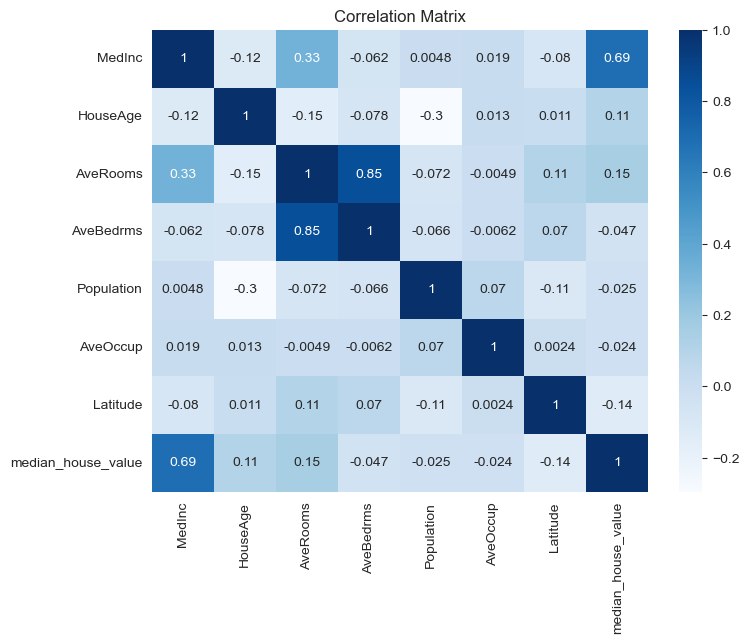

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_updated, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

Видим, что обычная линейная регрессия не может обучиться на таких данных, у нас очень много значений сконцентрировано около 2ки, поэтому модель чаще говорит, что целевое значение будет около 2х, нежели что-то другое. Попробуем исключить выбросы и посмотреть, что будет. Если убрать MedInc, то показатели заметно ухудшаются, тк наша модель все чаше и чаше будет предсказывать значения ближе к 2.

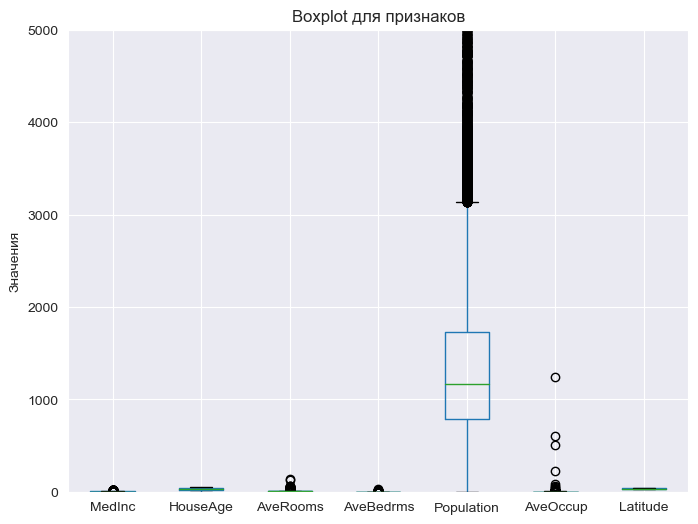

In [41]:
plt.figure(figsize=(8, 6))
X_upd.boxplot()
plt.title('Boxplot для признаков')
plt.ylabel('Значения')
plt.ylim(0, 5000)
plt.show()

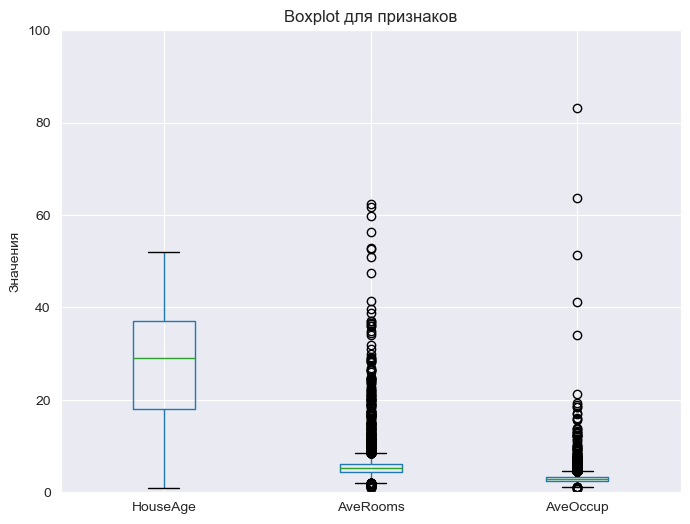

In [42]:
plt.figure(figsize=(8, 6))
X_upd.boxplot(column=['HouseAge', 'AveRooms', 'AveOccup'])
plt.title('Boxplot для признаков')
plt.ylabel('Значения')
plt.ylim(0, 100)
plt.show()

Для удаления выбросов будем использовать "правило трех сигм" (3-sigma rule). Еще часто используют правило межквартильного размаха (IQR) 

In [43]:
data = X_upd.join(y_upd)

# среднее и стандартное отклонение
mean = np.mean(data)
std_dev = np.std(data)

#  границы для выбросов (например, если вы хотите оставить значения в пределах 3 стандартных отклонений от среднего)
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# удаляем выбросы из данных
filtered_X_upd = data[(data >= lower_bound) & (data <= upper_bound)]

In [44]:
(pd.DataFrame(filtered_X_upd)).shape

(20640, 8)

In [45]:
data.shape

(20640, 8)

In [46]:
filtered_X_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20295 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20507 non-null  float64
 3   AveBedrms           20495 non-null  float64
 4   Population          20298 non-null  float64
 5   AveOccup            20632 non-null  float64
 6   Latitude            20640 non-null  float64
 7   median_house_value  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


Вместо того, чтобы удалять строки заменим пропущенные значения медианой по каждому столбцу. В целевой переменной пропусков нет, поэтому ничего с ней не произойдет, но так все равно делать не стоит (делаю в обучающих целях)

In [47]:
median_values = filtered_X_upd.median()
filtered_X_upd = filtered_X_upd.fillna(median_values)

In [48]:
filtered_X_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   median_house_value  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [49]:
filtered_y = data['median_house_value'] #ну можно и отсюда взять
filtered_X_upd = filtered_X_upd.drop(columns=['median_house_value'])

In [50]:
y_train, y_test, y_train_pred, y_test_pred= func_metrics(filtered_X_upd, filtered_y)

RMSE train:  0.8315873658321287 
RMSE test:  0.8638728536463023 
R2 train:  0.47444813449638146 
R2 test:  0.46467614670647117


все плохо

In [51]:
data = X_upd.join(y_upd)

# среднее и стандартное отклонение
mean = np.mean(data)
std_dev = np.std(data)

#  границы для выбросов (например, если вы хотите оставить значения в пределах 3 стандартных отклонений от среднего)
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# удаляем выбросы из данных
filtered_X_upd = data[(data >= lower_bound) & (data <= upper_bound)]

In [52]:
median_values = filtered_X_upd.median()
filtered_X_upd = filtered_X_upd.fillna(median_values)

In [53]:
filtered_y = filtered_X_upd['median_house_value'] #ну можно и отсюда взять
filtered_X_upd = filtered_X_upd.drop(columns=['median_house_value'])

In [54]:
y_train, y_test, y_train_pred, y_test_pred= func_metrics(filtered_X_upd, filtered_y)

RMSE train:  0.8315873658321287 
RMSE test:  0.8638728536463023 
R2 train:  0.47444813449638146 
R2 test:  0.46467614670647117


In [55]:
filtered_y.shape

(20640,)

In [56]:
data = X_upd.join(y_upd)

# среднее и стандартное отклонение
mean = np.mean(data)
std_dev = np.std(data)

#  границы для выбросов (например, если вы хотите оставить значения в пределах 3 стандартных отклонений от среднего)
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# удаляем выбросы из данных
filtered_X_upd = (data[(data >= lower_bound) & (data <= upper_bound)]).dropna()

In [57]:
filtered_y = filtered_X_upd['median_house_value'] #ну можно и отсюда взять
filtered_X_upd = filtered_X_upd.drop(columns=['median_house_value'])

In [58]:
filtered_y.shape

(19794,)

In [59]:
y_train, y_test, y_train_pred, y_test_pred= func_metrics(filtered_X_upd, filtered_y)

RMSE train:  0.7173034988501752 
RMSE test:  0.7241450052404208 
R2 train:  0.5798975375307469 
R2 test:  0.5749899768174396


In [60]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(
    degree=2,
    include_bias=False,
    interaction_only=True
)
X_ = poly.fit_transform(filtered_X_upd)
y_ = filtered_y

poly.get_feature_names_out()

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'MedInc HouseAge', 'MedInc AveRooms',
       'MedInc AveBedrms', 'MedInc Population', 'MedInc AveOccup',
       'MedInc Latitude', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'AveRooms AveBedrms', 'AveRooms Population', 'AveRooms AveOccup',
       'AveRooms Latitude', 'AveBedrms Population', 'AveBedrms AveOccup',
       'AveBedrms Latitude', 'Population AveOccup', 'Population Latitude',
       'AveOccup Latitude'], dtype=object)

In [61]:
X_train, X_test, y_train, y_test = func_metrics(X_, y_)

RMSE train:  0.6805885786978706 
RMSE test:  0.7124853688407878 
R2 train:  0.6218025100641298 
R2 test:  0.5885661742460758


Если удалять пропущенные строки, то результат лучше, чем с медианой. Это связано с тем, что у нас слишком много значений в окрестностях 2, линия просто стремится стать y=2 или равномерным распределением

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)

посмотрим на веса, те какой вклад вносит та или иная переменная

In [63]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i,name in enumerate(X.columns):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

    MedInc: 0.4405088702543993
  HouseAge: 0.009762950192122387
  AveRooms: -0.10991076286391863
 AveBedrms: 0.6498598826509678
Population: -3.584211908195037e-06
  AveOccup: -0.007927474050389632
  Latitude: -0.4136915704466418
 Longitude: -0.42774438742514875


In [64]:
linear_regression.intercept_

-36.40960826143727

In [65]:
X = filtered_X_upd
y = filtered_y

In [66]:
X.shape

(19794, 7)

In [67]:
y.shape

(19794,)

In [68]:
X['HouseAge^2'] = X['HouseAge'] * X['HouseAge']

In [69]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,HouseAge^2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,1681.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,441.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,2704.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,2704.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,2704.0
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,625.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,324.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,289.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,324.0


In [70]:
X['Population_log'] = np.log(X['Population'])

In [71]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,HouseAge^2,Population_log
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,1681.0,5.774552
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,441.0,7.783641
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,2704.0,6.206576
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,2704.0,6.324359
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,2704.0,6.336826
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,625.0,6.739337
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,324.0,5.874931
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,289.0,6.914731
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,324.0,6.608001


In [72]:
# X['MedInc^1/2'] = np.sqrt(X['MedInc'])

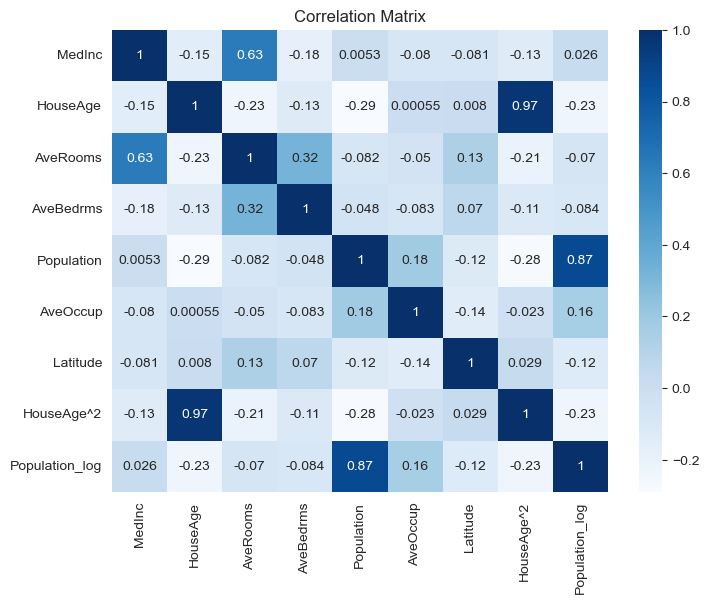

In [73]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [74]:
X = X.drop(columns=['Population', 'HouseAge'])

In [75]:
y_train, y_test, y_train_pred, y_test_pred= func_metrics(X, y)

RMSE train:  0.7184108503890487 
RMSE test:  0.7229298337832427 
R2 train:  0.5785994532727541 
R2 test:  0.5764151795474217


In [76]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_test_pred)
print(f'MAE: {mae}')

MAE: 0.5245654912923806


In [77]:
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [78]:
y = california_housing.target

In [79]:
X = data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=66)

In [81]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
l1 = linreg.score(X_train, y_train)
l2 = linreg.score(X_test, y_test)
print('R² of Linear Regression on training set: {:.3f}'.format(l1))
print('R² of Linear Regression on test set: {:.3f}'.format(l2))

R² of Linear Regression on training set: 0.603
R² of Linear Regression on test set: 0.609


In [82]:
y_train, y_test, tpred, testpred = func_metrics(X, y)

RMSE train:  0.7241463893887167 
RMSE test:  0.7315223258924335 
R2 train:  0.6014777660317849 
R2 test:  0.6161406602616051


| Модель                                     | RMSE     | R²       | 
|--------------------------------------------|----------|----------|
| Модель 1: Все признаки                      | 0.731    | 0.616    |
| Модель 2: Коррелированные признаки          | 0.798    | 0.542   |    
| Модель 3: Коррелированные признаки без выбросов | 0.863    | 0.464    | 

Нууу, результаты довольно своеобразны. можно заметить, что как только мы усредняем значения или уменьшаем количество признаков, то модель от этого лучше не становится. Вообще, мне понравился этот датасет, слишком непонятные выбросы, которые сложно обосновать. Полиномизация значительно переобучает модель, поэтому ее использовать тоже не стоит. Было проведено много экспериментов, значительные результаты, где метрика R^2 была больше 0.60 не были показаны на данном датасете.